In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Model():
    def __init__(self):
        self.r=2
        self.sigma=1.3
        self.h=np.array([1,0.7,-0.05])
        self.lam=np.array([4,5.5,7])
        self.T=1
        self.n=2048
        self.R0=2
        self.V0=20
        self.t=np.linspace(0,self.T,self.n)
    def procesWienera(self, plot=True):
        self.dW=np.random.randn(self.n-1)
        self.W=np.zeros(self.n)
        for i in range(self.n-1):
            self.W[i+1]=self.W[i]+np.sqrt(self.T/(self.n+1))*self.dW[i]
        if plot: return plt.plot(self.t,self.W)
    def procesyPoissona(self, k, plot=True):
        NT=np.random.poisson(lam=self.lam)
        self.N=np.zeros((NT.size,self.t.size))
        for i in range(NT.size):
            U=self.T*np.random.rand(NT[i])
            U=U.reshape(1,-1)
            self.t.reshape(-1,1)>U
            self.N[i,:]=np.sum(self.t.reshape(-1,1)>U,axis=1)
        if plot: return plt.plot(self.t,self.N[k])
    def procesR(self,plot=True):
        self.R= self.R0+(self.r-np.sum(self.lam))*self.t+self.W*self.sigma+np.sum(self.h.reshape(-1,1)*self.N,axis=0)
        if plot: return plt.plot(self.t,self.R)
    def procesV(self,plot=True):
        self.V=self.V0*np.exp((self.r-1/2*self.sigma*self.sigma -np.sum(self.h*self.lam))*self.t+self.sigma*self.W)*np.prod((self.h.reshape(-1,1)+1)**self.N,axis=0)
        if plot: return plt.plot(self.t,self.V)
    def SredniaWyplataOpcjaKupna(self,K, iteracje):
        x=0
        for i in range(iteracje):
            self.procesWienera(plot=False)
            self.procesyPoissona(0,plot=False)
            self.procesV(plot=False)
            x+=np.maximum(self.V[-1]-K,0)
        return (x/iteracje)


In [3]:
a=Model()

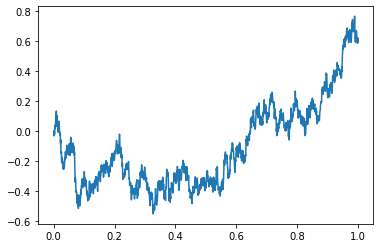

In [4]:
a.procesWienera()

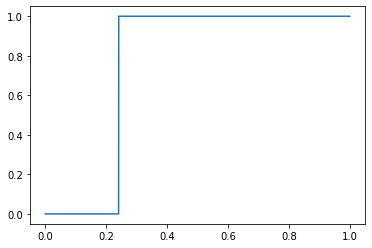

In [5]:
a.procesyPoissona(0)

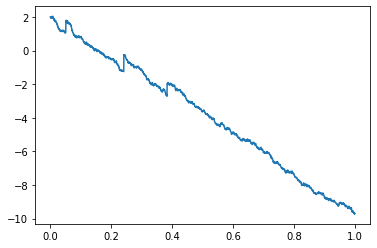

In [6]:
a.procesR()

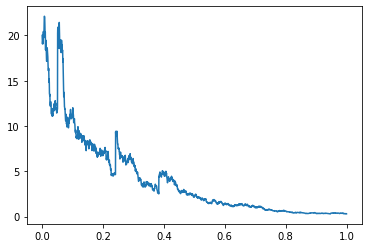

In [7]:
a.procesV()

In [8]:
a.SredniaWyplataOpcjaKupna(10,16384)

120.75054088295452